In [1]:
# import necessary packages
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.
/home/mohamed-mossad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohamed-mossad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohamed-mossad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohamed-mossad/.local/lib/python3.6

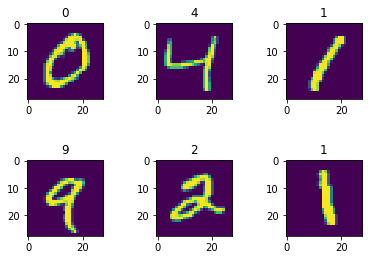

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load dataset
#FS
# show samples of the dataset
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [14]:
# more data exploration
print('trainig tensor shape {}'.format(x_train.shape))
print('Test data shape {}'.format(x_test.shape))
print('label tensor shape {} '.format(y_train.shape))

trainig tensor shape (60000, 28, 28)
Test data shape (10000, 28, 28)
label tensor shape (60000,) 


In [15]:
# data preprocessing 

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Convert y to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# neural network parameters to tune for best performance

1. number of hidden layers (many layers causes overfitting , very few layers underfitting)
2. number of neurons per layers (many neurons overfitting , very few underfitting)
3. activation function (you may change activation function but relu and sigmoid are good for many problems)
4. loss function (choose prober / sutiable loss function)
5. optimizer learning rate (very large rate >>> model may overshoot global minimum , and very low value model may stuck is local minimum)
6. batch size
7. number of epoches
8. also make sure features are scalled this has huge effect on performance


In [20]:
# build the network
# create model
model = Sequential()

model.add(Dense(image_vector_size//2,
                input_shape=x_train[0].shape,
                activation='relu'))
model.add(Dense(image_vector_size*2,
                activation='relu'))
model.add(Dense(image_vector_size*4,
               activation='relu'))

model.add(Dense(num_classes,
                activation='softmax'))
# Compile model
sgd = optimizers.SGD(lr=4)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_19 (Dense)             (None, 1568)              616224    
_________________________________________________________________
dense_20 (Dense)             (None, 3136)              4920384   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                31370     
Total params: 5,875,698
Trainable params: 5,875,698
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
EPOCHES=2
BATCH_SIZE=128
history=model.fit(x_train, y_train,
                  validation_data=(x_test, y_test), 
                  epochs=EPOCHES, 
                  batch_size=BATCH_SIZE,
                  verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1791 - accuracy: 0.1044 - val_loss: 0.1794 - val_accuracy: 0.1028
Epoch 2/2
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1791 - accuracy: 0.1044 - val_loss: 0.1794 - val_accuracy: 0.1028


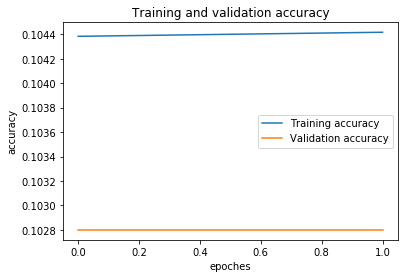

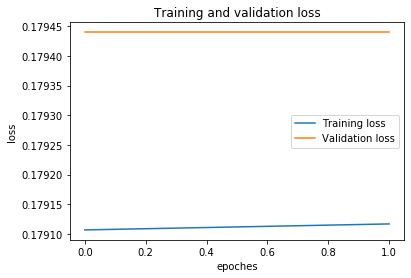

In [22]:
# Visualize loss and accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()

In [23]:
# model evaluation
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.1794400046825409
Test accuracy: 0.10279999673366547


In [31]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
predictions

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [36]:
# more evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(x_test)
print("Classification Report :\n {} \n Model Acurracy = {}".format(classification_report(np.argmax(y_test,axis=1)
                                                                                         ,np.argmax(predictions,
                                                                                                    axis=1)),
                                                                 accuracy_score(np.argmax(y_test,axis=1)
                                                                                         ,np.argmax(predictions,
                                                                                                    axis=1))))

Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.10      1.00      0.19      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000
 
 Model Acurracy = 0.1028


/home/mohamed-mossad/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1, 'Confusion Matrix')

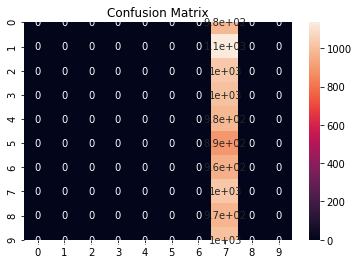

In [26]:
# confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)), range(10),range(10))

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_title('Confusion Matrix')